
 ## Przewidywanie hałasu płatu lotniczego na podstawie obserwacji w tunelu aerodynamicznym (Airfoil Self-Noise)


<b>1. Import i podział na wejściowy i wyjściowe:</b>

In [1]:
import pandas as pd
import numpy as np
 
df = pd.read_csv('airfoil_self_noise.csv')
#split data into x & y
data = df.iloc[1:,0:-1]
target = df.iloc[1:,-1]

<b>2. Analiza danych wejściowych</b>

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df.describe() #show data statistics

,%X1,X2,X3,X4,X5,X6
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


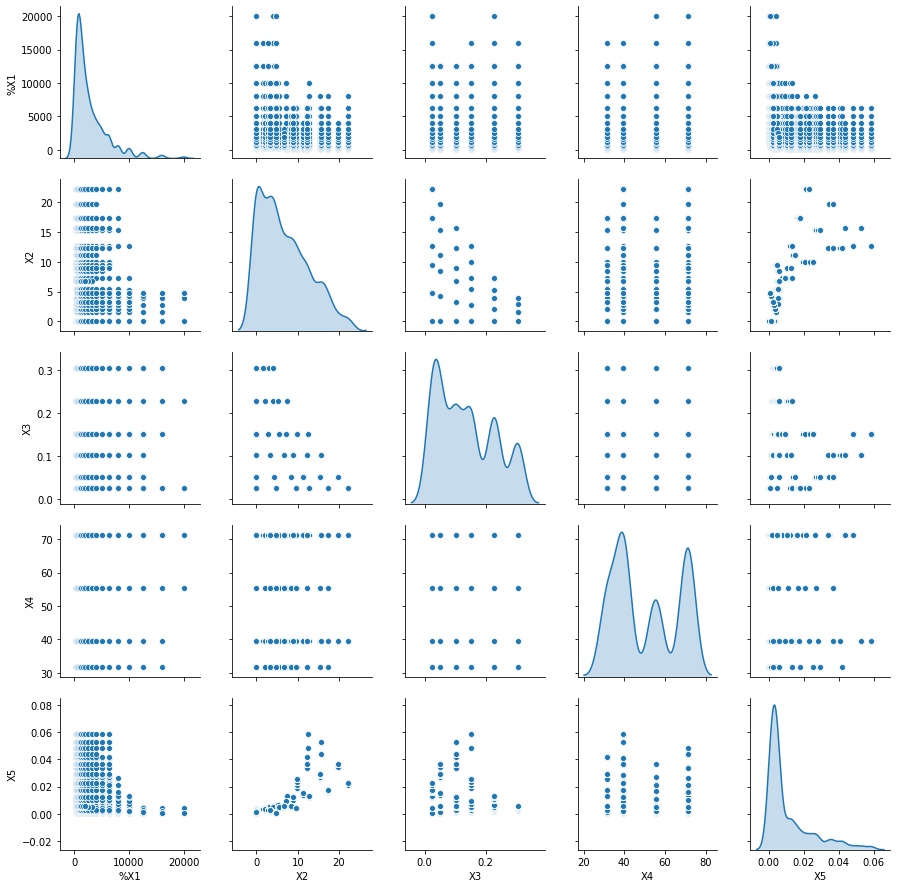

In [4]:
sb.pairplot(data, diag_kind="kde") #analyze data corelations

<b>3. Preprocessing</b>

In [5]:
from sklearn.preprocessing import StandardScaler

data_ = np.array(data,dtype = np.float64 )
target_ = np.array(target,dtype = np.float64 )

scaler = StandardScaler()
data_ = scaler.fit_transform(data_)

<b>4. Podział danych na zbiory trenujące i testujące</b>

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_,target_, test_size=0.1, random_state=10)

In [7]:
print("Airfoil Self-Noise training dataset:")
print("X:", train_data.shape)
print("Y:", train_target.shape)

Airfoil Self-Noise training dataset:
X: (1351, 5)
Y: (1351,)


In [8]:
print("Airfoil Self-Noise testing dataset:")
print("X:", test_data.shape)
print("Y:", test_target.shape)

Airfoil Self-Noise testing dataset:
X: (151, 5)
Y: (151,)


<b>5. Model regresji liniowej</b>

In [9]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>6. Ocena modelu regresji liniowej</b>

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), data_, target_, cv=12)

print("Błąd średniokwadratowy (MSE): %.2f" % mean_squared_error(test_target, linear_regression.predict(test_data)))
print('\nWspółczynnik determinancji (R2): %.2f' % r2_score(test_target, linear_regression.predict(test_data)))

print('\nZnaczenie współczynników w modelu: \n', linear_regression.coef_)

print("\nCross-walidacja: ", scores)

Błąd średniokwadratowy (MSE): 20.36

Współczynnik determinancji (R2): 0.54

Znaczenie współczynników w modelu: 
 [-4.05751142 -2.41196666 -3.29194034  1.6225726  -1.95688006]

Cross-walidacja:  [ 0.82598448  0.55700007  0.64938747  0.42091378  0.57875105  0.60424232
  0.24484821  0.36047721 -0.91113883 -0.16446975  0.60737192  0.53259869]


<b>7. Wykres błędów modelu regresji liniowej dla zbioru testującego:</b>

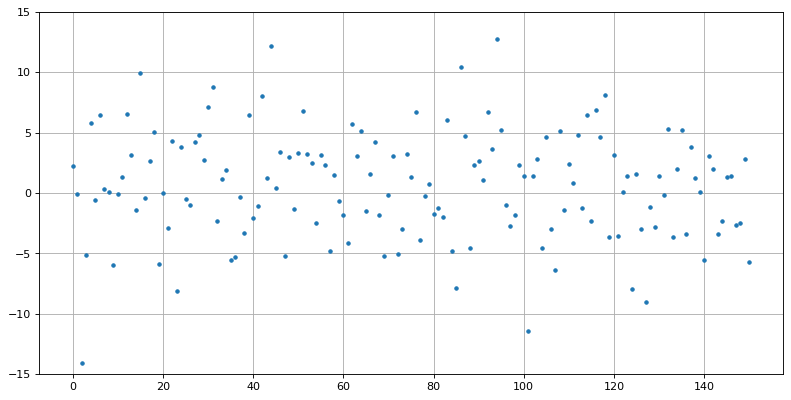

In [11]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 6), dpi=80)

errors = test_target-linear_regression.predict(test_data);

plt.plot(errors, '.')
plt.ylim(-15, 15)
plt.grid()

<b>8. Model regresji wielomianowej</b>

Błędy regresji liniowej:  [0, 20.36485373664118, 14.59606002310608, 10.554638523041335, 6.624658046948213, 6.21206604321736, 12.19278795036005, 73.54848721185401, 4823.897654140416, 119013.26699820721]


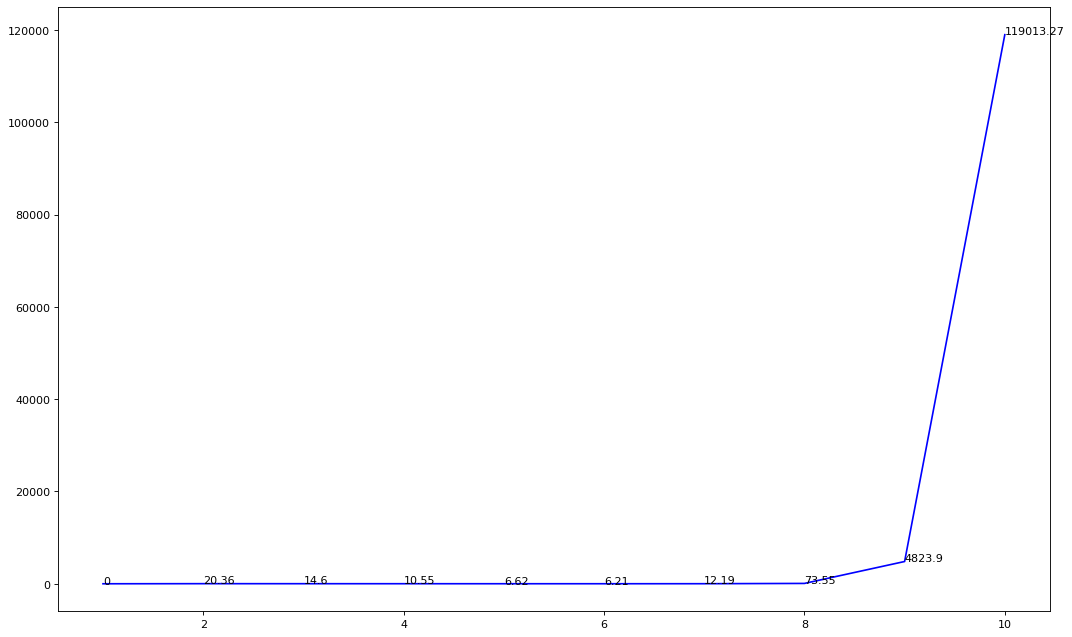

In [12]:
from sklearn.preprocessing import PolynomialFeatures

max_lev=10

lr_errors=[0 for i in range(0,max_lev)]

level=1;

while level<max_lev:
    pt = PolynomialFeatures(level, )#interaction_only=True)

    train_data_poly = pt.fit_transform(train_data)
    test_data_poly = pt.fit_transform(test_data)

    lr_poly = LinearRegression()
    lr_poly.fit(train_data_poly, train_target)
    
    lr_errors[level] = mean_squared_error(test_target, lr_poly.predict(test_data_poly))

    level = level+1

print('Błędy regresji liniowej: ', lr_errors)
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
x=[i for i in range(1,max_lev+1)]
plt.plot(x, lr_errors, color='blue')
for a,b in zip(x, lr_errors): 
    plt.text(a, b, str(round(b,2)))
plt.show()

<b>9. Ocena modelu regresji wielomianowej</b>

In [13]:
pt = PolynomialFeatures(6, )#interaction_only=True)

train_data_poly = pt.fit_transform(train_data)
test_data_poly = pt.fit_transform(test_data)

lr_poly = LinearRegression()
lr_poly.fit(train_data_poly, train_target)


scores = cross_val_score(LinearRegression(), data_, target_, cv=12)
print("Błąd średniokwadratowy (MSE): %.2f" % mean_squared_error(test_target, lr_poly.predict(test_data_poly)))
print('\nWspółczynnik determinancji (R2): %.2f' % r2_score(test_target, lr_poly.predict(test_data_poly)))

print('\nZnaczenie współczynników w modelu: \n', lr_poly.coef_)

print("\nCross-walidacja: ", scores)

Błąd średniokwadratowy (MSE): 12.19

Współczynnik determinancji (R2): 0.72

Znaczenie współczynników w modelu: 
 [ 6.12697240e-07 -1.49959915e+02  8.01456636e+01  1.24894104e+01
  1.35568341e+01 -2.46479023e+01 -4.42964328e+01  5.52894884e+02
  2.60015399e+02 -8.48905461e+01 -4.31302716e+02 -4.51542385e+00
 -6.14623742e+00 -2.75244143e+01  2.25661905e+00  2.37456806e+00
 -1.72263246e+01 -6.76258106e-01 -5.59273337e+00  1.29579761e+01
  3.63915692e+01 -2.84588458e+00  2.03653183e+02  4.16172207e+01
 -1.61219387e+01 -2.13787450e+02 -3.46232092e+02 -8.61339171e+02
  4.46102423e+02  4.23347666e+02 -2.66787384e+02  5.95841758e+01
  6.24093470e+02 -4.28327789e+00 -3.60177897e+02  3.56274213e+02
  1.16041868e+00  1.79618537e+01 -5.68341264e+01 -1.39998072e+01
 -4.83308204e+01 -2.56059341e+01 -9.38105788e+00  1.69800176e+01
 -7.42690178e+00 -3.29121419e+01 -1.42346335e+01 -2.18936822e+00
  4.59553581e-02  8.08516427e+00 -2.54966391e+01  1.06730719e+01
  2.56353957e+00 -9.42480477e+00 -4.460915

<b>10. Wykres błędów modelu regresji wielomianowej dla zbioru testującego:</b>

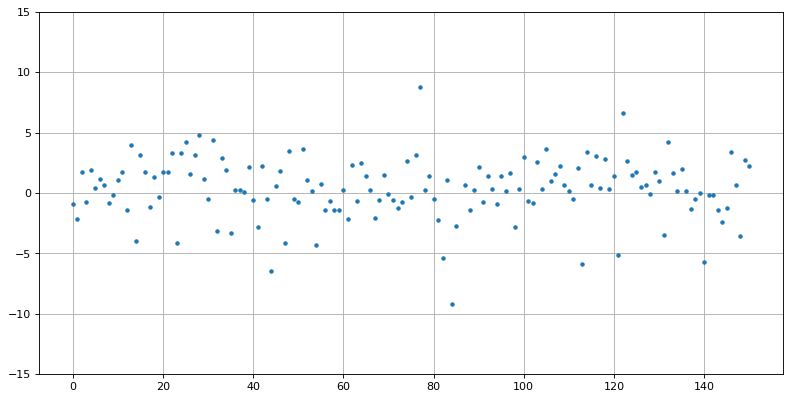

In [14]:
figure(num=None, figsize=(12, 6), dpi=80)

errors = test_target-lr_poly.predict(test_data_poly);

plt.plot(errors, '.')
plt.ylim(-15, 15)
plt.grid()

<b>11. Regularyzacja modelu regresji wielomianowej</b>

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

parameters=[{'alpha':np.linspace(0.1, 10.0, 10), 'l1_ratio':np.linspace(0,1,11)}]

model = GridSearchCV(ElasticNet(max_iter=1e6), parameters, cv=4, verbose=2)
model.fit(train_data_poly,train_target)

Fitting 4 folds for each of 440 candidates, totalling 1760 fits
[CV] alpha=0.1, l1_ratio=0.0 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6348.674260117999, tolerance: 4.881339501518263
  positive)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.6min remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.0, total= 5.7min
[CV] alpha=0.1, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6202.472888460699, tolerance: 4.836258308684502
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.0, total= 6.1min
[CV] alpha=0.1, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6031.521639794788, tolerance: 4.8261910706059234
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.0, total= 6.0min
[CV] alpha=0.1, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6308.750629723889, tolerance: 4.881662567347535
  positive)


[CV] .......................... alpha=0.1, l1_ratio=0.0, total= 7.6min
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total= 3.2min
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total= 2.8min
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total= 3.9min
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total= 4.4min
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.2, total= 1.8min
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.2, total=  60.0s
[CV] alpha=0.1, l1_ratio=0.2 .........................................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8165.129334732097, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=0.3025641025641026, l1_ratio=0.0, total= 8.0min
[CV] alpha=0.3025641025641026, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8049.11905673306, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=0.3025641025641026, l1_ratio=0.0, total= 7.8min
[CV] alpha=0.3025641025641026, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7702.623607477044, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=0.3025641025641026, l1_ratio=0.0, total= 7.9min
[CV] alpha=0.3025641025641026, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8030.801179242801, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=0.3025641025641026, l1_ratio=0.0, total= 7.5min
[CV] alpha=0.3025641025641026, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.1, total=  43.0s
[CV] alpha=0.3025641025641026, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.1, total=  48.8s
[CV] alpha=0.3025641025641026, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.1, total= 1.6min
[CV] alpha=0.3025641025641026, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.1, total=  55.1s
[CV] alpha=0.3025641025641026, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.2, total=  20.5s
[CV] alpha=0.3025641025641026, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.3025641025641026, l1_ratio=0.2, total=  49.8s
[CV] alpha=0.3025641025641026, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9046.272942684658, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=0.5051282051282051, l1_ratio=0.0, total= 8.0min
[CV] alpha=0.5051282051282051, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8944.985884804964, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=0.5051282051282051, l1_ratio=0.0, total= 7.9min
[CV] alpha=0.5051282051282051, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8516.587492642671, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=0.5051282051282051, l1_ratio=0.0, total= 8.3min
[CV] alpha=0.5051282051282051, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8848.827887476995, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=0.5051282051282051, l1_ratio=0.0, total= 7.7min
[CV] alpha=0.5051282051282051, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.1, total=  21.1s
[CV] alpha=0.5051282051282051, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.1, total= 1.3min
[CV] alpha=0.5051282051282051, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.1, total=  42.0s
[CV] alpha=0.5051282051282051, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.1, total= 1.1min
[CV] alpha=0.5051282051282051, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.2, total=  19.5s
[CV] alpha=0.5051282051282051, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.5051282051282051, l1_ratio=0.2, total=  17.0s
[CV] alpha=0.5051282051282051, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9630.134641116087, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=0.7076923076923077, l1_ratio=0.0, total= 8.2min
[CV] alpha=0.7076923076923077, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9536.800093463242, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=0.7076923076923077, l1_ratio=0.0, total= 8.4min
[CV] alpha=0.7076923076923077, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9058.153168092398, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=0.7076923076923077, l1_ratio=0.0, total= 7.3min
[CV] alpha=0.7076923076923077, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9382.938950644275, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=0.7076923076923077, l1_ratio=0.0, total= 8.0min
[CV] alpha=0.7076923076923077, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.1, total=  14.5s
[CV] alpha=0.7076923076923077, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.1, total=  38.4s
[CV] alpha=0.7076923076923077, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.1, total=  21.3s
[CV] alpha=0.7076923076923077, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.1, total=  15.0s
[CV] alpha=0.7076923076923077, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.2, total=  11.0s
[CV] alpha=0.7076923076923077, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.7076923076923077, l1_ratio=0.2, total=   9.7s
[CV] alpha=0.7076923076923077, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10066.748968540132, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=0.9102564102564102, l1_ratio=0.0, total= 7.1min
[CV] alpha=0.9102564102564102, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9978.032956218654, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=0.9102564102564102, l1_ratio=0.0, total= 8.3min
[CV] alpha=0.9102564102564102, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9464.724323502542, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=0.9102564102564102, l1_ratio=0.0, total= 7.6min
[CV] alpha=0.9102564102564102, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9778.953163131911, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=0.9102564102564102, l1_ratio=0.0, total= 7.8min
[CV] alpha=0.9102564102564102, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.1, total=  10.0s
[CV] alpha=0.9102564102564102, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.1, total=  13.8s
[CV] alpha=0.9102564102564102, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.1, total=  15.7s
[CV] alpha=0.9102564102564102, l1_ratio=0.1 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.1, total=  10.1s
[CV] alpha=0.9102564102564102, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.2, total=  10.1s
[CV] alpha=0.9102564102564102, l1_ratio=0.2 ..........................
[CV] ........... alpha=0.9102564102564102, l1_ratio=0.2, total=   6.6s
[CV] alpha=0.9102564102564102, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10415.571740321084, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=1.1128205128205129, l1_ratio=0.0, total= 8.4min
[CV] alpha=1.1128205128205129, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10329.735281739684, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=1.1128205128205129, l1_ratio=0.0, total= 8.1min
[CV] alpha=1.1128205128205129, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9790.852452484152, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=1.1128205128205129, l1_ratio=0.0, total= 8.3min
[CV] alpha=1.1128205128205129, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10093.964724895279, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=1.1128205128205129, l1_ratio=0.0, total= 8.1min
[CV] alpha=1.1128205128205129, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.1, total=   8.2s
[CV] alpha=1.1128205128205129, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.1, total=  11.4s
[CV] alpha=1.1128205128205129, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.1, total=  12.1s
[CV] alpha=1.1128205128205129, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.1, total=   8.7s
[CV] alpha=1.1128205128205129, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.2, total=  11.6s
[CV] alpha=1.1128205128205129, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.1128205128205129, l1_ratio=0.2, total=   4.6s
[CV] alpha=1.1128205128205129, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10706.155321719494, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=1.3153846153846156, l1_ratio=0.0, total= 7.8min
[CV] alpha=1.3153846153846156, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10622.290012031415, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=1.3153846153846156, l1_ratio=0.0, total= 8.2min
[CV] alpha=1.3153846153846156, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10063.662154769443, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=1.3153846153846156, l1_ratio=0.0, total= 8.0min
[CV] alpha=1.3153846153846156, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10355.971065606494, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=1.3153846153846156, l1_ratio=0.0, total= 7.4min
[CV] alpha=1.3153846153846156, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.1, total=   8.3s
[CV] alpha=1.3153846153846156, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.1, total=   9.2s
[CV] alpha=1.3153846153846156, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.1, total=   9.7s
[CV] alpha=1.3153846153846156, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.1, total=   8.4s
[CV] alpha=1.3153846153846156, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.2, total=  10.0s
[CV] alpha=1.3153846153846156, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.3153846153846156, l1_ratio=0.2, total=   3.8s
[CV] alpha=1.3153846153846156, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10955.292938543178, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=1.517948717948718, l1_ratio=0.0, total= 8.6min
[CV] alpha=1.517948717948718, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10872.946257217875, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=1.517948717948718, l1_ratio=0.0, total= 7.4min
[CV] alpha=1.517948717948718, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10298.555544606774, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=1.517948717948718, l1_ratio=0.0, total= 8.1min
[CV] alpha=1.517948717948718, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10580.674437679698, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=1.517948717948718, l1_ratio=0.0, total= 7.4min
[CV] alpha=1.517948717948718, l1_ratio=0.1 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.1, total=   6.9s
[CV] alpha=1.517948717948718, l1_ratio=0.1 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.1, total=   7.7s
[CV] alpha=1.517948717948718, l1_ratio=0.1 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.1, total=  16.9s
[CV] alpha=1.517948717948718, l1_ratio=0.1 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.1, total=   9.0s
[CV] alpha=1.517948717948718, l1_ratio=0.2 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.2, total=  10.1s
[CV] alpha=1.517948717948718, l1_ratio=0.2 ...........................
[CV] ............ alpha=1.517948717948718, l1_ratio=0.2, total=   4.7s
[CV] alpha=1.517948717948718, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11173.425482282544, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=1.7205128205128206, l1_ratio=0.0, total= 7.3min
[CV] alpha=1.7205128205128206, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11092.400858702042, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=1.7205128205128206, l1_ratio=0.0, total= 8.5min
[CV] alpha=1.7205128205128206, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10505.095223310358, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=1.7205128205128206, l1_ratio=0.0, total= 9.6min
[CV] alpha=1.7205128205128206, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10777.71882590284, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=1.7205128205128206, l1_ratio=0.0, total= 7.8min
[CV] alpha=1.7205128205128206, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.1, total=   6.3s
[CV] alpha=1.7205128205128206, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.1, total=   5.9s
[CV] alpha=1.7205128205128206, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.1, total=  10.0s
[CV] alpha=1.7205128205128206, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.1, total=  10.9s
[CV] alpha=1.7205128205128206, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.2, total=   8.5s
[CV] alpha=1.7205128205128206, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.7205128205128206, l1_ratio=0.2, total=   3.8s
[CV] alpha=1.7205128205128206, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11367.48086943834, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=1.9230769230769231, l1_ratio=0.0, total= 7.0min
[CV] alpha=1.9230769230769231, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11287.725700358806, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=1.9230769230769231, l1_ratio=0.0, total= 7.1min
[CV] alpha=1.9230769230769231, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10689.61548469829, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=1.9230769230769231, l1_ratio=0.0, total= 7.3min
[CV] alpha=1.9230769230769231, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10953.432282564683, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=1.9230769230769231, l1_ratio=0.0, total= 6.8min
[CV] alpha=1.9230769230769231, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.1, total=   5.1s
[CV] alpha=1.9230769230769231, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.1, total=   5.4s
[CV] alpha=1.9230769230769231, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.1, total=  10.9s
[CV] alpha=1.9230769230769231, l1_ratio=0.1 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.1, total=  11.0s
[CV] alpha=1.9230769230769231, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.2, total=   8.1s
[CV] alpha=1.9230769230769231, l1_ratio=0.2 ..........................
[CV] ........... alpha=1.9230769230769231, l1_ratio=0.2, total=   4.7s
[CV] alpha=1.9230769230769231, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11542.289061561345, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=2.1256410256410256, l1_ratio=0.0, total= 7.0min
[CV] alpha=2.1256410256410256, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11463.830088644827, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=2.1256410256410256, l1_ratio=0.0, total= 7.2min
[CV] alpha=2.1256410256410256, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10856.524549644942, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=2.1256410256410256, l1_ratio=0.0, total= 7.2min
[CV] alpha=2.1256410256410256, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11112.182353335418, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=2.1256410256410256, l1_ratio=0.0, total= 6.6min
[CV] alpha=2.1256410256410256, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.1, total=   5.5s
[CV] alpha=2.1256410256410256, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.1, total=   7.1s
[CV] alpha=2.1256410256410256, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.1, total=  11.1s
[CV] alpha=2.1256410256410256, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.1, total=   9.7s
[CV] alpha=2.1256410256410256, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.2, total=   7.1s
[CV] alpha=2.1256410256410256, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.1256410256410256, l1_ratio=0.2, total=   5.8s
[CV] alpha=2.1256410256410256, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11701.351021713497, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=2.3282051282051284, l1_ratio=0.0, total= 7.2min
[CV] alpha=2.3282051282051284, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11624.256371940877, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=2.3282051282051284, l1_ratio=0.0, total= 7.1min
[CV] alpha=2.3282051282051284, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11009.012244802765, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=2.3282051282051284, l1_ratio=0.0, total= 6.9min
[CV] alpha=2.3282051282051284, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11257.106548413372, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=2.3282051282051284, l1_ratio=0.0, total= 6.6min
[CV] alpha=2.3282051282051284, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.1, total=   3.9s
[CV] alpha=2.3282051282051284, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.1, total=   7.5s
[CV] alpha=2.3282051282051284, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.1, total=   7.7s
[CV] alpha=2.3282051282051284, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.1, total=   5.3s
[CV] alpha=2.3282051282051284, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.2, total=   5.3s
[CV] alpha=2.3282051282051284, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.3282051282051284, l1_ratio=0.2, total=   6.7s
[CV] alpha=2.3282051282051284, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11847.285487949546, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=2.530769230769231, l1_ratio=0.0, total= 6.9min
[CV] alpha=2.530769230769231, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11771.642205863252, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=2.530769230769231, l1_ratio=0.0, total= 7.0min
[CV] alpha=2.530769230769231, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11149.460954999926, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=2.530769230769231, l1_ratio=0.0, total= 7.0min
[CV] alpha=2.530769230769231, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11390.533273645713, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=2.530769230769231, l1_ratio=0.0, total= 6.5min
[CV] alpha=2.530769230769231, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.1, total=   4.2s
[CV] alpha=2.530769230769231, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.1, total=   6.2s
[CV] alpha=2.530769230769231, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.1, total=   8.9s
[CV] alpha=2.530769230769231, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.1, total=   4.6s
[CV] alpha=2.530769230769231, l1_ratio=0.2 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.2, total=   4.8s
[CV] alpha=2.530769230769231, l1_ratio=0.2 ...........................
[CV] ............ alpha=2.530769230769231, l1_ratio=0.2, total=   9.1s
[CV] alpha=2.530769230769231, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11982.102796901312, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=2.7333333333333334, l1_ratio=0.0, total= 6.8min
[CV] alpha=2.7333333333333334, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11908.003586701041, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=2.7333333333333334, l1_ratio=0.0, total= 7.1min
[CV] alpha=2.7333333333333334, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11279.697252129321, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=2.7333333333333334, l1_ratio=0.0, total= 7.2min
[CV] alpha=2.7333333333333334, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11514.237738412743, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=2.7333333333333334, l1_ratio=0.0, total= 6.8min
[CV] alpha=2.7333333333333334, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.1, total=   5.3s
[CV] alpha=2.7333333333333334, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.1, total=   6.3s
[CV] alpha=2.7333333333333334, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.1, total=   7.1s
[CV] alpha=2.7333333333333334, l1_ratio=0.1 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.1, total=   8.2s
[CV] alpha=2.7333333333333334, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.2, total=   4.7s
[CV] alpha=2.7333333333333334, l1_ratio=0.2 ..........................
[CV] ........... alpha=2.7333333333333334, l1_ratio=0.2, total=  12.5s
[CV] alpha=2.7333333333333334, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12107.380212158172, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=2.935897435897436, l1_ratio=0.0, total= 7.0min
[CV] alpha=2.935897435897436, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12034.915745031998, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=2.935897435897436, l1_ratio=0.0, total= 6.8min
[CV] alpha=2.935897435897436, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11401.152807546776, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=2.935897435897436, l1_ratio=0.0, total= 7.3min
[CV] alpha=2.935897435897436, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11629.6045265705, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=2.935897435897436, l1_ratio=0.0, total= 6.9min
[CV] alpha=2.935897435897436, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.1, total=   4.9s
[CV] alpha=2.935897435897436, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.1, total=   5.1s
[CV] alpha=2.935897435897436, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.1, total=   7.7s
[CV] alpha=2.935897435897436, l1_ratio=0.1 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.1, total=  11.2s
[CV] alpha=2.935897435897436, l1_ratio=0.2 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.2, total=   3.9s
[CV] alpha=2.935897435897436, l1_ratio=0.2 ...........................
[CV] ............ alpha=2.935897435897436, l1_ratio=0.2, total=   9.0s
[CV] alpha=2.935897435897436, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12224.37836414725, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=3.1384615384615384, l1_ratio=0.0, total= 7.0min
[CV] alpha=3.1384615384615384, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12153.63298317301, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=3.1384615384615384, l1_ratio=0.0, total= 6.9min
[CV] alpha=3.1384615384615384, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11514.971098112723, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=3.1384615384615384, l1_ratio=0.0, total= 6.8min
[CV] alpha=3.1384615384615384, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11737.73474338997, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=3.1384615384615384, l1_ratio=0.0, total= 6.7min
[CV] alpha=3.1384615384615384, l1_ratio=0.1 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.1, total=   4.7s
[CV] alpha=3.1384615384615384, l1_ratio=0.1 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.1, total=   7.6s
[CV] alpha=3.1384615384615384, l1_ratio=0.1 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.1, total=   6.6s
[CV] alpha=3.1384615384615384, l1_ratio=0.1 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.1, total=  10.3s
[CV] alpha=3.1384615384615384, l1_ratio=0.2 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.2, total=   3.7s
[CV] alpha=3.1384615384615384, l1_ratio=0.2 ..........................
[CV] ........... alpha=3.1384615384615384, l1_ratio=0.2, total=   9.8s
[CV] alpha=3.1384615384615384, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12334.121016290343, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=3.341025641025641, l1_ratio=0.0, total= 6.8min
[CV] alpha=3.341025641025641, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12265.170524663145, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=3.341025641025641, l1_ratio=0.0, total= 6.7min
[CV] alpha=3.341025641025641, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11622.080383958179, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=3.341025641025641, l1_ratio=0.0, total= 6.3min
[CV] alpha=3.341025641025641, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11839.518878020976, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=3.341025641025641, l1_ratio=0.0, total= 5.6min
[CV] alpha=3.341025641025641, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.1, total=   4.7s
[CV] alpha=3.341025641025641, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.1, total=   8.5s
[CV] alpha=3.341025641025641, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.1, total=   4.3s
[CV] alpha=3.341025641025641, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.1, total=   9.1s
[CV] alpha=3.341025641025641, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.2, total=   3.4s
[CV] alpha=3.341025641025641, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.341025641025641, l1_ratio=0.2, total=   6.9s
[CV] alpha=3.341025641025641, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12437.451184715146, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=3.543589743589744, l1_ratio=0.0, total= 5.8min
[CV] alpha=3.543589743589744, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12370.361907981045, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=3.543589743589744, l1_ratio=0.0, total= 5.8min
[CV] alpha=3.543589743589744, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11723.244963538875, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=3.543589743589744, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.543589743589744, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11935.687707166999, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=3.543589743589744, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.543589743589744, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.1, total=   3.8s
[CV] alpha=3.543589743589744, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.1, total=   8.3s
[CV] alpha=3.543589743589744, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.1, total=   4.2s
[CV] alpha=3.543589743589744, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.1, total=   8.6s
[CV] alpha=3.543589743589744, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.2, total=   3.0s
[CV] alpha=3.543589743589744, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.543589743589744, l1_ratio=0.2, total=   6.7s
[CV] alpha=3.543589743589744, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12535.071547622882, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=3.746153846153846, l1_ratio=0.0, total= 5.9min
[CV] alpha=3.746153846153846, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12469.900166010926, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=3.746153846153846, l1_ratio=0.0, total= 5.8min
[CV] alpha=3.746153846153846, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11819.102015108301, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=3.746153846153846, l1_ratio=0.0, total= 5.8min
[CV] alpha=3.746153846153846, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12026.848703655143, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=3.746153846153846, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.746153846153846, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.1, total=   3.7s
[CV] alpha=3.746153846153846, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.1, total=   8.3s
[CV] alpha=3.746153846153846, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.1, total=   3.9s
[CV] alpha=3.746153846153846, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.1, total=   8.8s
[CV] alpha=3.746153846153846, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.2, total=   0.9s
[CV] alpha=3.746153846153846, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.746153846153846, l1_ratio=0.2, total=   6.2s
[CV] alpha=3.746153846153846, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12627.574140460798, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=3.948717948717949, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.948717948717949, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12564.367975185643, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=3.948717948717949, l1_ratio=0.0, total= 6.1min
[CV] alpha=3.948717948717949, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11910.188622620004, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=3.948717948717949, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.948717948717949, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12113.512622546012, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=3.948717948717949, l1_ratio=0.0, total= 5.7min
[CV] alpha=3.948717948717949, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.1, total=   3.5s
[CV] alpha=3.948717948717949, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.1, total=   8.1s
[CV] alpha=3.948717948717949, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.1, total=   3.8s
[CV] alpha=3.948717948717949, l1_ratio=0.1 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.1, total=   8.4s
[CV] alpha=3.948717948717949, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.2, total=   0.9s
[CV] alpha=3.948717948717949, l1_ratio=0.2 ...........................
[CV] ............ alpha=3.948717948717949, l1_ratio=0.2, total=   5.8s
[CV] alpha=3.948717948717949, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12715.462574175886, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=4.151282051282051, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.151282051282051, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12654.260128731377, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=4.151282051282051, l1_ratio=0.0, total= 5.8min
[CV] alpha=4.151282051282051, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11996.961962384281, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=4.151282051282051, l1_ratio=0.0, total= 5.8min
[CV] alpha=4.151282051282051, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12196.113274734167, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=4.151282051282051, l1_ratio=0.0, total= 5.6min
[CV] alpha=4.151282051282051, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.1, total=   3.6s
[CV] alpha=4.151282051282051, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.1, total=   8.4s
[CV] alpha=4.151282051282051, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.1, total=   3.6s
[CV] alpha=4.151282051282051, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.1, total=   7.8s
[CV] alpha=4.151282051282051, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.2, total=   0.9s
[CV] alpha=4.151282051282051, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.151282051282051, l1_ratio=0.2, total=   5.9s
[CV] alpha=4.151282051282051, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12799.168928192867, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=4.3538461538461535, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.3538461538461535, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12740.000559568221, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=4.3538461538461535, l1_ratio=0.0, total= 5.8min
[CV] alpha=4.3538461538461535, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12079.814626201645, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=4.3538461538461535, l1_ratio=0.0, total= 5.7min
[CV] alpha=4.3538461538461535, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12275.02247720086, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=4.3538461538461535, l1_ratio=0.0, total= 5.6min
[CV] alpha=4.3538461538461535, l1_ratio=0.1 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.1, total=   3.3s
[CV] alpha=4.3538461538461535, l1_ratio=0.1 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.1, total=   7.5s
[CV] alpha=4.3538461538461535, l1_ratio=0.1 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.1, total=   3.3s
[CV] alpha=4.3538461538461535, l1_ratio=0.1 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.1, total=   7.5s
[CV] alpha=4.3538461538461535, l1_ratio=0.2 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.2, total=   1.9s
[CV] alpha=4.3538461538461535, l1_ratio=0.2 ..........................
[CV] ........... alpha=4.3538461538461535, l1_ratio=0.2, total=   5.5s
[CV] alpha=4.3538461538461535, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12879.066780558876, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=4.556410256410256, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.556410256410256, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12821.95542241637, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=4.556410256410256, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.556410256410256, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12159.086422532791, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=4.556410256410256, l1_ratio=0.0, total= 5.8min
[CV] alpha=4.556410256410256, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12350.561524713397, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=4.556410256410256, l1_ratio=0.0, total= 5.7min
[CV] alpha=4.556410256410256, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.1, total=   3.5s
[CV] alpha=4.556410256410256, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.1, total=   7.5s
[CV] alpha=4.556410256410256, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.1, total=   3.3s
[CV] alpha=4.556410256410256, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.1, total=   7.2s
[CV] alpha=4.556410256410256, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.2, total=   2.3s
[CV] alpha=4.556410256410256, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.556410256410256, l1_ratio=0.2, total=   6.0s
[CV] alpha=4.556410256410256, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12955.48139005277, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=4.758974358974359, l1_ratio=0.0, total= 5.9min
[CV] alpha=4.758974358974359, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12900.443279968316, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=4.758974358974359, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.758974358974359, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12235.073584922508, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=4.758974358974359, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.758974358974359, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12423.01011057673, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=4.758974358974359, l1_ratio=0.0, total= 5.6min
[CV] alpha=4.758974358974359, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.1, total=   3.4s
[CV] alpha=4.758974358974359, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.1, total=   8.0s
[CV] alpha=4.758974358974359, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.1, total=   3.3s
[CV] alpha=4.758974358974359, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.1, total=   6.9s
[CV] alpha=4.758974358974359, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.2, total=   0.5s
[CV] alpha=4.758974358974359, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.758974358974359, l1_ratio=0.2, total=   5.5s
[CV] alpha=4.758974358974359, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13028.697746760387, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=4.961538461538462, l1_ratio=0.0, total= 6.0min
[CV] alpha=4.961538461538462, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12975.743129089951, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=4.961538461538462, l1_ratio=0.0, total= 5.7min
[CV] alpha=4.961538461538462, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12308.036043285105, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=4.961538461538462, l1_ratio=0.0, total= 5.7min
[CV] alpha=4.961538461538462, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12492.613348835657, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=4.961538461538462, l1_ratio=0.0, total= 5.6min
[CV] alpha=4.961538461538462, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.1, total=   3.1s
[CV] alpha=4.961538461538462, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.1, total=   7.6s
[CV] alpha=4.961538461538462, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.1, total=   3.0s
[CV] alpha=4.961538461538462, l1_ratio=0.1 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.1, total=   6.9s
[CV] alpha=4.961538461538462, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.2, total=   0.5s
[CV] alpha=4.961538461538462, l1_ratio=0.2 ...........................
[CV] ............ alpha=4.961538461538462, l1_ratio=0.2, total=   5.2s
[CV] alpha=4.961538461538462, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13098.967006036219, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=5.1641025641025635, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.1641025641025635, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13048.100794273018, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=5.1641025641025635, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.1641025641025635, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12378.203228039702, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=5.1641025641025635, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.1641025641025635, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12559.58736306402, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=5.1641025641025635, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.1641025641025635, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.1, total=   3.5s
[CV] alpha=5.1641025641025635, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.1, total=   6.8s
[CV] alpha=5.1641025641025635, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.1, total=   2.7s
[CV] alpha=5.1641025641025635, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.1, total=   6.6s
[CV] alpha=5.1641025641025635, l1_ratio=0.2 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.2, total=   0.5s
[CV] alpha=5.1641025641025635, l1_ratio=0.2 ..........................
[CV] ........... alpha=5.1641025641025635, l1_ratio=0.2, total=   3.0s
[CV] alpha=5.1641025641025635, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13166.511681065516, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=5.366666666666666, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.366666666666666, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13117.73407159847, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=5.366666666666666, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.366666666666666, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12445.778749525172, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=5.366666666666666, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.366666666666666, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12624.123780071219, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=5.366666666666666, l1_ratio=0.0, total= 5.6min
[CV] alpha=5.366666666666666, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.1, total=   1.8s
[CV] alpha=5.366666666666666, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.1, total=   6.8s
[CV] alpha=5.366666666666666, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.1, total=   3.3s
[CV] alpha=5.366666666666666, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.1, total=   6.6s
[CV] alpha=5.366666666666666, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.2, total=   0.5s
[CV] alpha=5.366666666666666, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.366666666666666, l1_ratio=0.2, total=   3.0s
[CV] alpha=5.366666666666666, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13231.5298713073, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=5.569230769230769, l1_ratio=0.0, total= 6.2min
[CV] alpha=5.569230769230769, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13184.836905504504, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=5.569230769230769, l1_ratio=0.0, total= 5.9min
[CV] alpha=5.569230769230769, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12510.944205065394, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=5.569230769230769, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.569230769230769, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12686.393376903618, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=5.569230769230769, l1_ratio=0.0, total= 5.6min
[CV] alpha=5.569230769230769, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.1, total=   1.8s
[CV] alpha=5.569230769230769, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.1, total=   6.5s
[CV] alpha=5.569230769230769, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.1, total=   2.8s
[CV] alpha=5.569230769230769, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.1, total=   6.2s
[CV] alpha=5.569230769230769, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.2, total=   0.4s
[CV] alpha=5.569230769230769, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.569230769230769, l1_ratio=0.2, total=   2.3s
[CV] alpha=5.569230769230769, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13294.19873459404, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=5.771794871794872, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.771794871794872, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13249.58280915265, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=5.771794871794872, l1_ratio=0.0, total= 5.9min
[CV] alpha=5.771794871794872, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12573.862302570864, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=5.771794871794872, l1_ratio=0.0, total= 5.8min
[CV] alpha=5.771794871794872, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12746.549066215806, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=5.771794871794872, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.771794871794872, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.1, total=   1.8s
[CV] alpha=5.771794871794872, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.1, total=   6.4s
[CV] alpha=5.771794871794872, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.1, total=   2.8s
[CV] alpha=5.771794871794872, l1_ratio=0.1 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.1, total=   6.1s
[CV] alpha=5.771794871794872, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.2, total=   0.5s
[CV] alpha=5.771794871794872, l1_ratio=0.2 ...........................
[CV] ............ alpha=5.771794871794872, l1_ratio=0.2, total=   2.2s
[CV] alpha=5.771794871794872, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13354.677359918229, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=5.9743589743589745, l1_ratio=0.0, total= 6.0min
[CV] alpha=5.9743589743589745, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13312.127687389127, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=5.9743589743589745, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.9743589743589745, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12634.679443410587, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=5.9743589743589745, l1_ratio=0.0, total= 5.7min
[CV] alpha=5.9743589743589745, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12804.728359705914, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=5.9743589743589745, l1_ratio=0.0, total= 5.5min
[CV] alpha=5.9743589743589745, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.1, total=   1.9s
[CV] alpha=5.9743589743589745, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.1, total=   6.4s
[CV] alpha=5.9743589743589745, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.1, total=   2.2s
[CV] alpha=5.9743589743589745, l1_ratio=0.1 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.1, total=   6.1s
[CV] alpha=5.9743589743589745, l1_ratio=0.2 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.2, total=   0.7s
[CV] alpha=5.9743589743589745, l1_ratio=0.2 ..........................
[CV] ........... alpha=5.9743589743589745, l1_ratio=0.2, total=   1.9s
[CV] alpha=5.9743589743589745, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13413.109161409737, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=6.176923076923076, l1_ratio=0.0, total= 5.9min
[CV] alpha=6.176923076923076, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13372.612183783507, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=6.176923076923076, l1_ratio=0.0, total= 5.9min
[CV] alpha=6.176923076923076, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12693.52787354087, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=6.176923076923076, l1_ratio=0.0, total= 6.1min
[CV] alpha=6.176923076923076, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12861.055415750503, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=6.176923076923076, l1_ratio=0.0, total= 5.7min
[CV] alpha=6.176923076923076, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.1, total=   1.8s
[CV] alpha=6.176923076923076, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.1, total=   6.1s
[CV] alpha=6.176923076923076, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.1, total=   2.2s
[CV] alpha=6.176923076923076, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.1, total=   6.0s
[CV] alpha=6.176923076923076, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.2, total=   0.5s
[CV] alpha=6.176923076923076, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.176923076923076, l1_ratio=0.2, total=   2.8s
[CV] alpha=6.176923076923076, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13469.62388627679, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=6.379487179487179, l1_ratio=0.0, total= 5.9min
[CV] alpha=6.379487179487179, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13431.163645195034, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=6.379487179487179, l1_ratio=0.0, total= 5.7min
[CV] alpha=6.379487179487179, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12750.527487226593, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=6.379487179487179, l1_ratio=0.0, total= 7.6min
[CV] alpha=6.379487179487179, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12915.642753406384, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=6.379487179487179, l1_ratio=0.0, total= 7.7min
[CV] alpha=6.379487179487179, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.1, total=   2.3s
[CV] alpha=6.379487179487179, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.1, total=   8.8s
[CV] alpha=6.379487179487179, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.1, total=   3.3s
[CV] alpha=6.379487179487179, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.1, total=   5.8s
[CV] alpha=6.379487179487179, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.2, total=   1.0s
[CV] alpha=6.379487179487179, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.379487179487179, l1_ratio=0.2, total=   3.2s
[CV] alpha=6.379487179487179, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13524.339309529332, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=6.582051282051282, l1_ratio=0.0, total= 6.6min
[CV] alpha=6.582051282051282, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13487.897776596308, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=6.582051282051282, l1_ratio=0.0, total= 7.2min
[CV] alpha=6.582051282051282, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12805.787348907535, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=6.582051282051282, l1_ratio=0.0, total= 6.7min
[CV] alpha=6.582051282051282, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12968.592696169248, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=6.582051282051282, l1_ratio=0.0, total= 6.7min
[CV] alpha=6.582051282051282, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.1, total=   1.3s
[CV] alpha=6.582051282051282, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.1, total=   5.9s
[CV] alpha=6.582051282051282, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.1, total=   3.6s
[CV] alpha=6.582051282051282, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.1, total=   6.3s
[CV] alpha=6.582051282051282, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.2, total=   1.8s
[CV] alpha=6.582051282051282, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.582051282051282, l1_ratio=0.2, total=   4.5s
[CV] alpha=6.582051282051282, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13577.3626723844, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=6.7846153846153845, l1_ratio=0.0, total= 6.7min
[CV] alpha=6.7846153846153845, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13542.920043377497, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=6.7846153846153845, l1_ratio=0.0, total= 6.8min
[CV] alpha=6.7846153846153845, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12859.406984797204, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=6.7846153846153845, l1_ratio=0.0, total= 7.1min
[CV] alpha=6.7846153846153845, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13019.998595449346, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=6.7846153846153845, l1_ratio=0.0, total= 6.7min
[CV] alpha=6.7846153846153845, l1_ratio=0.1 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.1, total=   1.1s
[CV] alpha=6.7846153846153845, l1_ratio=0.1 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.1, total=   7.0s
[CV] alpha=6.7846153846153845, l1_ratio=0.1 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.1, total=   5.7s
[CV] alpha=6.7846153846153845, l1_ratio=0.1 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.1, total=   5.5s
[CV] alpha=6.7846153846153845, l1_ratio=0.2 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.2, total=   1.2s
[CV] alpha=6.7846153846153845, l1_ratio=0.2 ..........................
[CV] ........... alpha=6.7846153846153845, l1_ratio=0.2, total=   3.0s
[CV] alpha=6.7846153846153845, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13628.79190973232, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=6.987179487179487, l1_ratio=0.0, total= 7.0min
[CV] alpha=6.987179487179487, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13596.326866197898, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=6.987179487179487, l1_ratio=0.0, total= 7.1min
[CV] alpha=6.987179487179487, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12911.477484993082, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=6.987179487179487, l1_ratio=0.0, total= 6.1min
[CV] alpha=6.987179487179487, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13069.945873242177, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=6.987179487179487, l1_ratio=0.0, total= 5.8min
[CV] alpha=6.987179487179487, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.1, total=   0.6s
[CV] alpha=6.987179487179487, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.1, total=   5.5s
[CV] alpha=6.987179487179487, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.1, total=   4.0s
[CV] alpha=6.987179487179487, l1_ratio=0.1 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.1, total=   5.4s
[CV] alpha=6.987179487179487, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.2, total=   1.4s
[CV] alpha=6.987179487179487, l1_ratio=0.2 ...........................
[CV] ............ alpha=6.987179487179487, l1_ratio=0.2, total=   2.8s
[CV] alpha=6.987179487179487, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13678.716702930506, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=7.189743589743589, l1_ratio=0.0, total= 7.1min
[CV] alpha=7.189743589743589, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13648.206644297836, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=7.189743589743589, l1_ratio=0.0, total= 8.0min
[CV] alpha=7.189743589743589, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12962.082448872958, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=7.189743589743589, l1_ratio=0.0, total= 7.4min
[CV] alpha=7.189743589743589, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13118.512915297299, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=7.189743589743589, l1_ratio=0.0, total= 6.0min
[CV] alpha=7.189743589743589, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.1, total=   1.1s
[CV] alpha=7.189743589743589, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.1, total=   5.3s
[CV] alpha=7.189743589743589, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.1, total=   4.2s
[CV] alpha=7.189743589743589, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.1, total=   5.1s
[CV] alpha=7.189743589743589, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.2, total=   1.3s
[CV] alpha=7.189743589743589, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.189743589743589, l1_ratio=0.2, total=   2.9s
[CV] alpha=7.189743589743589, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13727.219386915129, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=7.392307692307692, l1_ratio=0.0, total= 6.0min
[CV] alpha=7.392307692307692, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13698.640636418051, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=7.392307692307692, l1_ratio=0.0, total= 5.7min
[CV] alpha=7.392307692307692, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13011.29879984618, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=7.392307692307692, l1_ratio=0.0, total= 5.9min
[CV] alpha=7.392307692307692, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13165.771840145298, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=7.392307692307692, l1_ratio=0.0, total= 5.8min
[CV] alpha=7.392307692307692, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.1, total=   1.8s
[CV] alpha=7.392307692307692, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.1, total=   3.8s
[CV] alpha=7.392307692307692, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.1, total=   3.8s
[CV] alpha=7.392307692307692, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.1, total=   4.9s
[CV] alpha=7.392307692307692, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.2, total=   1.3s
[CV] alpha=7.392307692307692, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.392307692307692, l1_ratio=0.2, total=   2.7s
[CV] alpha=7.392307692307692, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13774.375735337864, tolerance: 4.881339501518263
  positive)


[CV] ........... alpha=7.5948717948717945, l1_ratio=0.0, total= 6.4min
[CV] alpha=7.5948717948717945, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13747.703722328373, tolerance: 4.836258308684502
  positive)


[CV] ........... alpha=7.5948717948717945, l1_ratio=0.0, total= 8.4min
[CV] alpha=7.5948717948717945, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13059.197490785316, tolerance: 4.8261910706059234
  positive)


[CV] ........... alpha=7.5948717948717945, l1_ratio=0.0, total= 7.2min
[CV] alpha=7.5948717948717945, l1_ratio=0.0 ..........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13211.789164090136, tolerance: 4.881662567347535
  positive)


[CV] ........... alpha=7.5948717948717945, l1_ratio=0.0, total= 6.5min
[CV] alpha=7.5948717948717945, l1_ratio=0.1 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.1, total=   1.9s
[CV] alpha=7.5948717948717945, l1_ratio=0.1 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.1, total=   4.8s
[CV] alpha=7.5948717948717945, l1_ratio=0.1 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.1, total=   3.9s
[CV] alpha=7.5948717948717945, l1_ratio=0.1 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.1, total=   6.9s
[CV] alpha=7.5948717948717945, l1_ratio=0.2 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.2, total=   1.9s
[CV] alpha=7.5948717948717945, l1_ratio=0.2 ..........................
[CV] ........... alpha=7.5948717948717945, l1_ratio=0.2, total=   3.7s
[CV] alpha=7.5948717948717945, l1_ratio=0.2 ..........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13820.255643003102, tolerance: 4.881339501518263
  positive)


[CV] ............ alpha=7.797435897435897, l1_ratio=0.0, total= 7.0min
[CV] alpha=7.797435897435897, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13795.465064319575, tolerance: 4.836258308684502
  positive)


[CV] ............ alpha=7.797435897435897, l1_ratio=0.0, total= 7.1min
[CV] alpha=7.797435897435897, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13105.844117393619, tolerance: 4.8261910706059234
  positive)


[CV] ............ alpha=7.797435897435897, l1_ratio=0.0, total= 7.1min
[CV] alpha=7.797435897435897, l1_ratio=0.0 ...........................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13256.626379025829, tolerance: 4.881662567347535
  positive)


[CV] ............ alpha=7.797435897435897, l1_ratio=0.0, total= 7.0min
[CV] alpha=7.797435897435897, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.1, total=   1.8s
[CV] alpha=7.797435897435897, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.1, total=   3.2s
[CV] alpha=7.797435897435897, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.1, total=   2.4s
[CV] alpha=7.797435897435897, l1_ratio=0.1 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.1, total=   4.8s
[CV] alpha=7.797435897435897, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.2, total=   1.4s
[CV] alpha=7.797435897435897, l1_ratio=0.2 ...........................
[CV] ............ alpha=7.797435897435897, l1_ratio=0.2, total=   2.7s
[CV] alpha=7.797435897435897, l1_ratio=0.2 ...........................
[CV] .

C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13864.923721308889, tolerance: 4.881339501518263
  positive)


[CV] .......................... alpha=8.0, l1_ratio=0.0, total= 6.7min
[CV] alpha=8.0, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13841.988683914042, tolerance: 4.836258308684502
  positive)


[CV] .......................... alpha=8.0, l1_ratio=0.0, total= 7.2min
[CV] alpha=8.0, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13151.299453698875, tolerance: 4.8261910706059234
  positive)


[CV] .......................... alpha=8.0, l1_ratio=0.0, total= 7.5min
[CV] alpha=8.0, l1_ratio=0.0 .........................................


C:\Users\Toschenko\Miniconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13300.340456351269, tolerance: 4.881662567347535
  positive)


[CV] .......................... alpha=8.0, l1_ratio=0.0, total= 8.5min
[CV] alpha=8.0, l1_ratio=0.1 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.1, total=   3.5s
[CV] alpha=8.0, l1_ratio=0.1 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.1, total=   4.1s
[CV] alpha=8.0, l1_ratio=0.1 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.1, total=   3.3s
[CV] alpha=8.0, l1_ratio=0.1 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.1, total=   6.8s
[CV] alpha=8.0, l1_ratio=0.2 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.2, total=   1.9s
[CV] alpha=8.0, l1_ratio=0.2 .........................................
[CV] .......................... alpha=8.0, l1_ratio=0.2, total=   3.8s
[CV] alpha=8.0, l1_ratio=0.2 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed: 1217.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000000.0,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.1       , 0.3025641 , 0.50512821, 0.70769231, 0.910...
       4.15128205, 4.35384615, 4.55641026, 4.75897436, 4.96153846,
       5.16410256, 5.36666667, 5.56923077, 5.77179487, 5.97435897,
       6.17692308, 6.37948718, 6.58205128, 6.78461538, 6.98717949,
       7.18974359, 7.39230769, 7.59487179, 7.7974359 , 8.        ]),
                          'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}],
             pre_dispatch='2*n_job

In [16]:
print(model.best_params_)
print(model.best_estimator_)

{'alpha': 0.1, 'l1_ratio': 1.0}
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1.0,
           max_iter=1000000.0, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)


<b>12. Ocena modelu po regularyzacji</b>

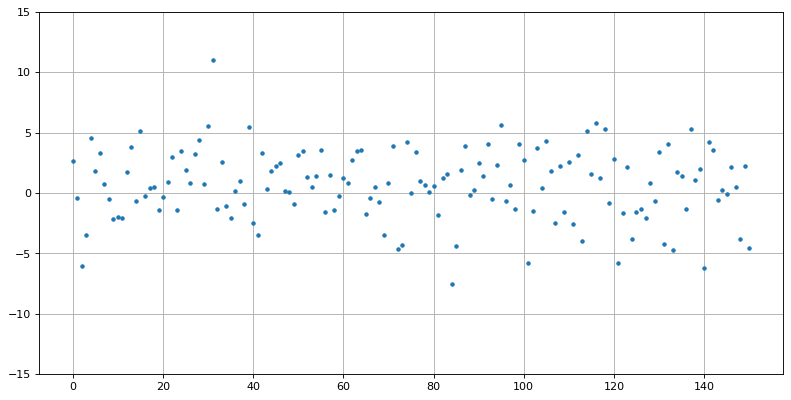

In [19]:
reg = ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1.0,
           max_iter=1000000.0, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

reg.fit(train_data_poly, train_target)


figure(num=None, figsize=(12, 6), dpi=80)

errors = test_target-reg.predict(test_data_poly);

plt.plot(errors, '.')
plt.ylim(-15, 15)
plt.grid()

In [21]:
print("Błąd średniokwadratowy (MSE): %.2f" % mean_squared_error(test_target, reg.predict(test_data_poly)))
print('\nWspółczynnik determinancji (R2): %.2f' % r2_score(test_target, reg.predict(test_data_poly)))

Błąd średniokwadratowy (MSE): 8.84

Współczynnik determinancji (R2): 0.80
